
# Pokémon MLOps Project 
### Dataset Context
The Pokémon dataset used in this project comes from Kaggle and contains detailed information about more than 800 Pokémon.  
Each Pokémon is described by:

- Combat statistics (attack, defense, speed, etc.)
- Physical characteristics (height, weight)
- Types and elemental weaknesses
- Abilities
- Legendary status

### Project Goal
The objective of this project is not only to train a model, but to design a complete **MLOps pipeline** that includes:

- Data ingestion  
- Data cleaning  
- Feature engineering  
- Modeling  
- Experiment tracking with MLflow  

This notebook documents all these stages.

The prediction task is:

> **Binary classification: determine whether a Pokémon is legendary or not.**



### Project Structure

The project follows a architecture inspired by learned during the MLOps modules

```
pokemon_mlops/
│
├── data/
│   ├── raw.csv
│   ├── cleaned.csv
│   └── engineered.csv
│
├── application/
│   ├── data_collection.py
│   ├── data_preparation.py
│   ├── feature_engineering.py
│   └── modeling.py
│
├── domain/
│   ├── model.py
│   └── feature_engineering.py
│
├── infrastructure/
│   └── extract.py
│
└── notebooks/
    └── analysis.ipynb
```

Each module has a very specific responsibility.
<!--  -->

<!-- 
### MLOps Pipeline Stages

The project is organized into five main stages:

1. **Data Collection**  
   - Load raw dataset  
   - Save it in a structured format  

2. **Data Preparation**  
   - Clean missing values  
   - Remove unnecessary columns  
   - Prepare data for analysis  

3. **Feature Engineering**  
   - Select numeric features  
   - Transform data into model-ready format  

4. **Modeling**  
   - Train multiple algorithms  
   - Evaluate performance  

5. **Auto MLflow Tracking**  
   - Log metrics  
   - Compare experiments  
   - Save models  

This notebook reproduces each of these steps. -->


# DATA COLLECTION
In this stage, the raw Pokémon dataset was loaded and stored in the project structure to ensure reproducibility. Basic validations were performed to confirm data integrity and correct format.

This step was also used to carry out preliminary descriptive analytics, allowing an initial understanding of the dataset before moving to data preparation and feature engineering.


## Imports and Configuration

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")


## Loading the Raw Dataset

In [6]:

raw = pd.read_csv("../data/raw.csv")
raw.head()


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


### General Information About the Dataset

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

## Descriptive Statistics

In [8]:
raw.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000



## Ability-Based Analysis

Abilities are a key aspect of Pokémon.  
Understanding which abilities are most common and which are associated with powerful Pokémon can provide valuable insights.


### Most Common Abilities

C:\Users\khady\AppData\Local\Temp\ipykernel_12660\1612071731.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


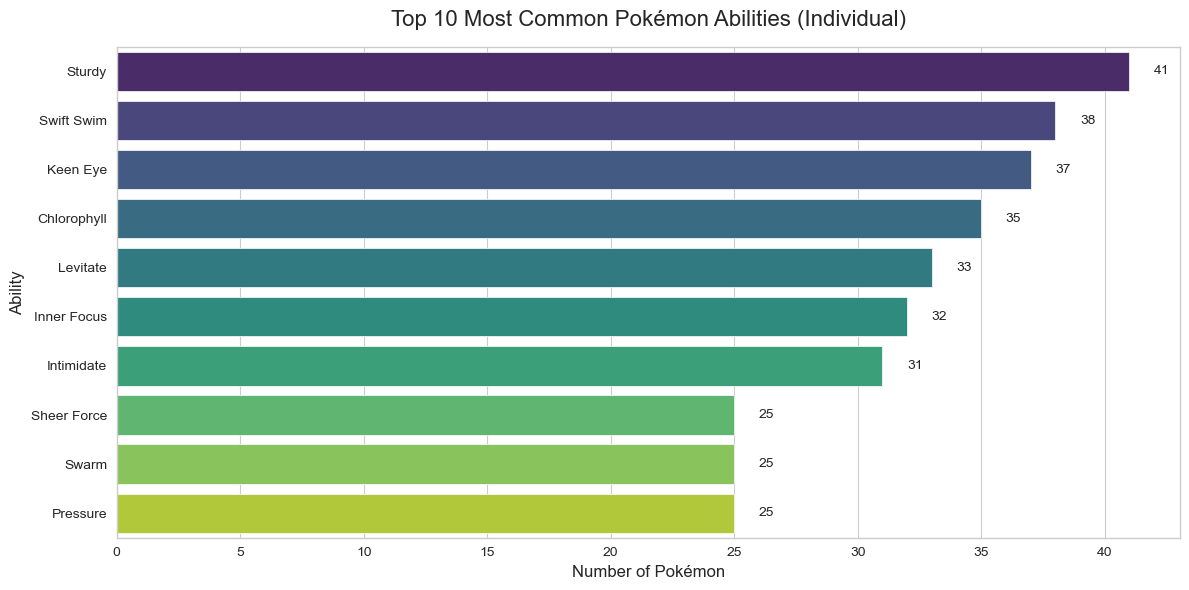

In [9]:
import ast

# Convert string representation of lists into a lits
raw["abilities_list"] = raw["abilities"].apply(ast.literal_eval)

all_abilities = []

for ability_list in raw["abilities_list"]:
    all_abilities.extend(ability_list)

ability_counts = pd.Series(all_abilities).value_counts().head(10)
ability_counts

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

ax = sns.barplot(
    x=ability_counts.values,
    y=ability_counts.index,
    palette="viridis"
)

ax.set_title("Top 10 Most Common Pokémon Abilities (Individual)", fontsize=16, pad=15)
ax.set_xlabel("Number of Pokémon", fontsize=12)
ax.set_ylabel("Ability", fontsize=12)

for i, v in enumerate(ability_counts.values):
    ax.text(v + 1, i, str(v), va='center')

plt.tight_layout()
plt.show()


### Top Abilities Among Legendary Pokémon

C:\Users\khady\AppData\Local\Temp\ipykernel_12660\3637063685.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


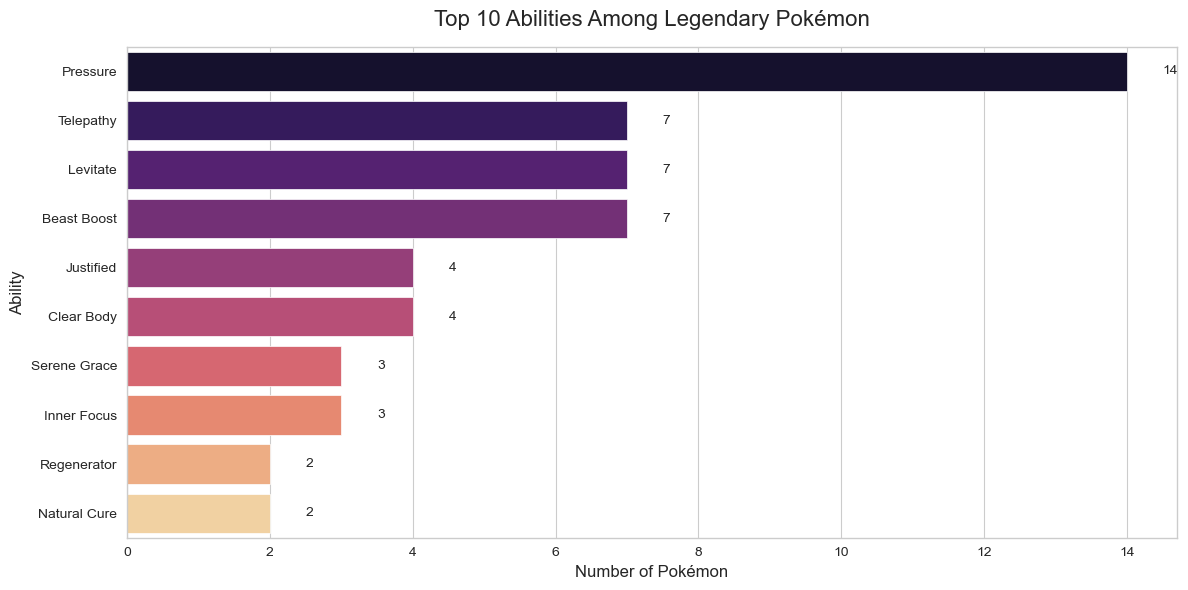

In [10]:
import ast

raw["abilities_list"] = raw["abilities"].apply(ast.literal_eval)

legendary = raw[raw["is_legendary"] == 1]

legendary_abilities = []

for ability_list in legendary["abilities_list"]:
    legendary_abilities.extend(ability_list)

legendary_counts = pd.Series(legendary_abilities).value_counts().head(10)
legendary_counts

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

ax = sns.barplot(
    x=legendary_counts.values,
    y=legendary_counts.index,
    palette="magma"
)

ax.set_title("Top 10 Abilities Among Legendary Pokémon", fontsize=16, pad=15)
ax.set_xlabel("Number of Pokémon", fontsize=12)
ax.set_ylabel("Ability", fontsize=12)

for i, v in enumerate(legendary_counts.values):
    ax.text(v + 0.5, i, str(v), va='center')

plt.tight_layout()
plt.show()



### Abilities Associated With High Base Total

We now analyze which abilities appear most frequently among the strongest Pokémon.


C:\Users\khady\AppData\Local\Temp\ipykernel_12660\4012266103.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


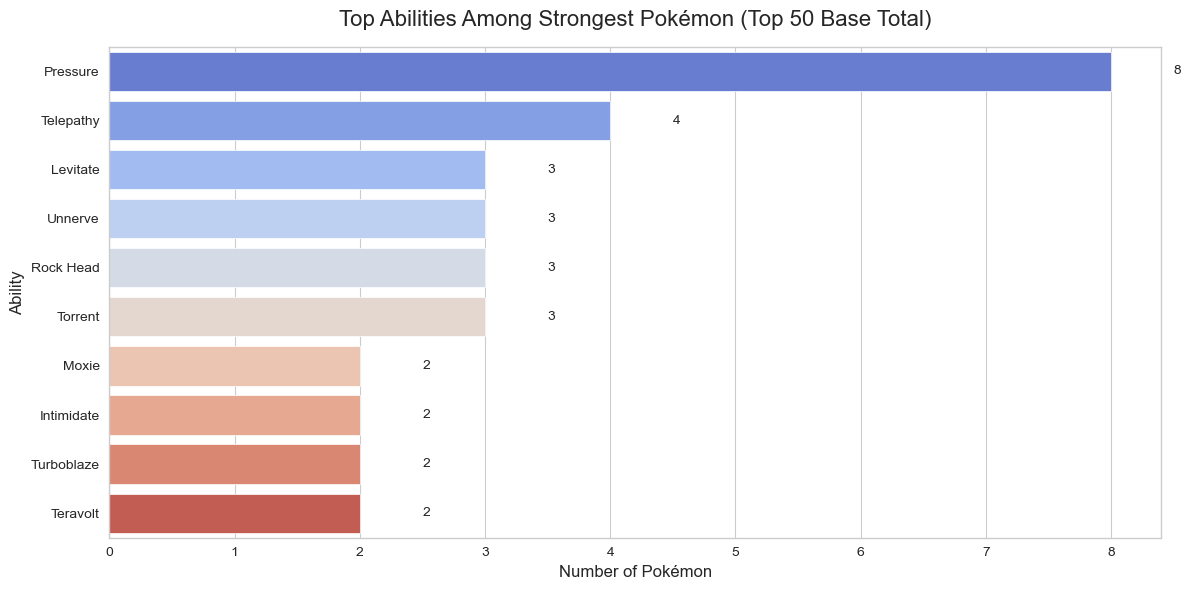

In [11]:
import ast
raw["abilities_list"] = raw["abilities"].apply(ast.literal_eval)

strong = raw.sort_values(by="base_total", ascending=False).head(50)
strong_abilities = []

for ability_list in strong["abilities_list"]:
    strong_abilities.extend(ability_list)
strong_counts = pd.Series(strong_abilities).value_counts().head(10)
strong_counts

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

ax = sns.barplot(
    x=strong_counts.values,
    y=strong_counts.index,
    palette="coolwarm"
)

ax.set_title("Top Abilities Among Strongest Pokémon (Top 50 Base Total)", fontsize=16, pad=15)
ax.set_xlabel("Number of Pokémon", fontsize=12)
ax.set_ylabel("Ability", fontsize=12)

for i, v in enumerate(strong_counts.values):
    ax.text(v + 0.5, i, str(v), va='center')

plt.tight_layout()
plt.show()


## Top Pokémon Rankings

### Top 15 Pokémon by Base Total

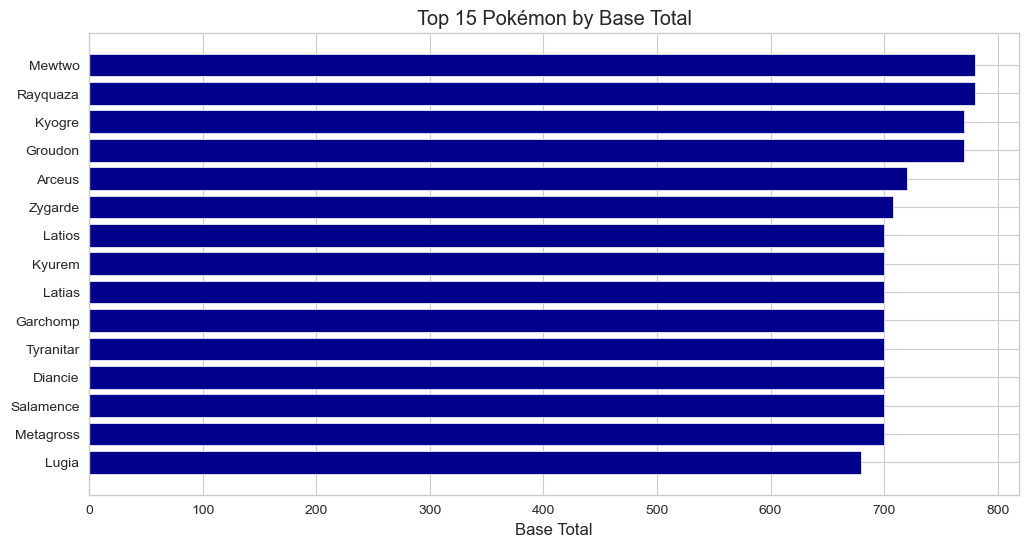

In [12]:

top_total = raw.sort_values(by="base_total", ascending=False).head(15)

plt.figure(figsize=(12,6))
plt.barh(top_total["name"], top_total["base_total"], color="darkblue")
plt.title("Top 15 Pokémon by Base Total")
plt.xlabel("Base Total")
plt.gca().invert_yaxis()
plt.show()


### Top 15 Pokémon by Speed

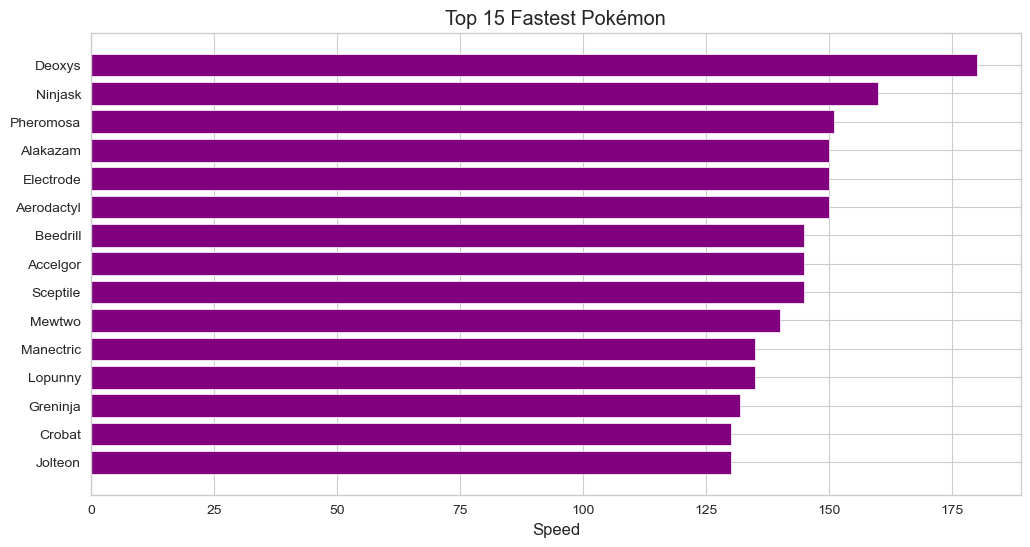

In [13]:

top_speed = raw.sort_values(by="speed", ascending=False).head(15)

plt.figure(figsize=(12,6))
plt.barh(top_speed["name"], top_speed["speed"], color="purple")
plt.title("Top 15 Fastest Pokémon")
plt.xlabel("Speed")
plt.gca().invert_yaxis()
plt.show()


### Top 15 Pokémon by Attack

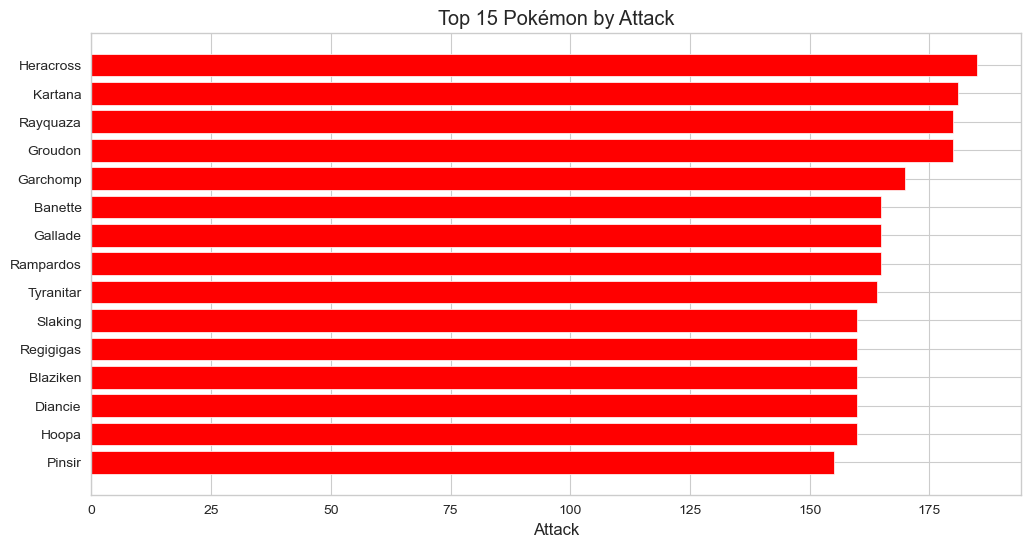

In [14]:

top_attack = raw.sort_values(by="attack", ascending=False).head(15)

plt.figure(figsize=(12,6))
plt.barh(top_attack["name"], top_attack["attack"], color="red")
plt.title("Top 15 Pokémon by Attack")
plt.xlabel("Attack")
plt.gca().invert_yaxis()
plt.show()


### Top 15 Pokémon by Defense

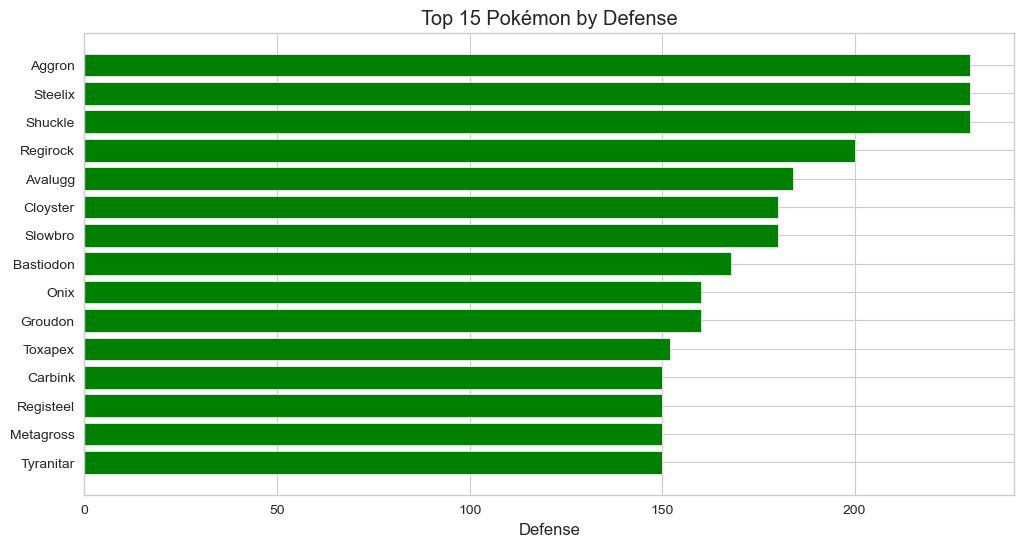

In [15]:

top_def = raw.sort_values(by="defense", ascending=False).head(15)

plt.figure(figsize=(12,6))
plt.barh(top_def["name"], top_def["defense"], color="green")
plt.title("Top 15 Pokémon by Defense")
plt.xlabel("Defense")
plt.gca().invert_yaxis()
plt.show()


## Correlation Analysis

### Purpose of the Correlation Matrix

The correlation matrix helps us understand the linear relationships between numerical variables.

It allows us to:

- Identify which attributes are strongly related  
- Detect redundant features  
- Understand the internal structure of the dataset  
- Support decisions in feature engineering  


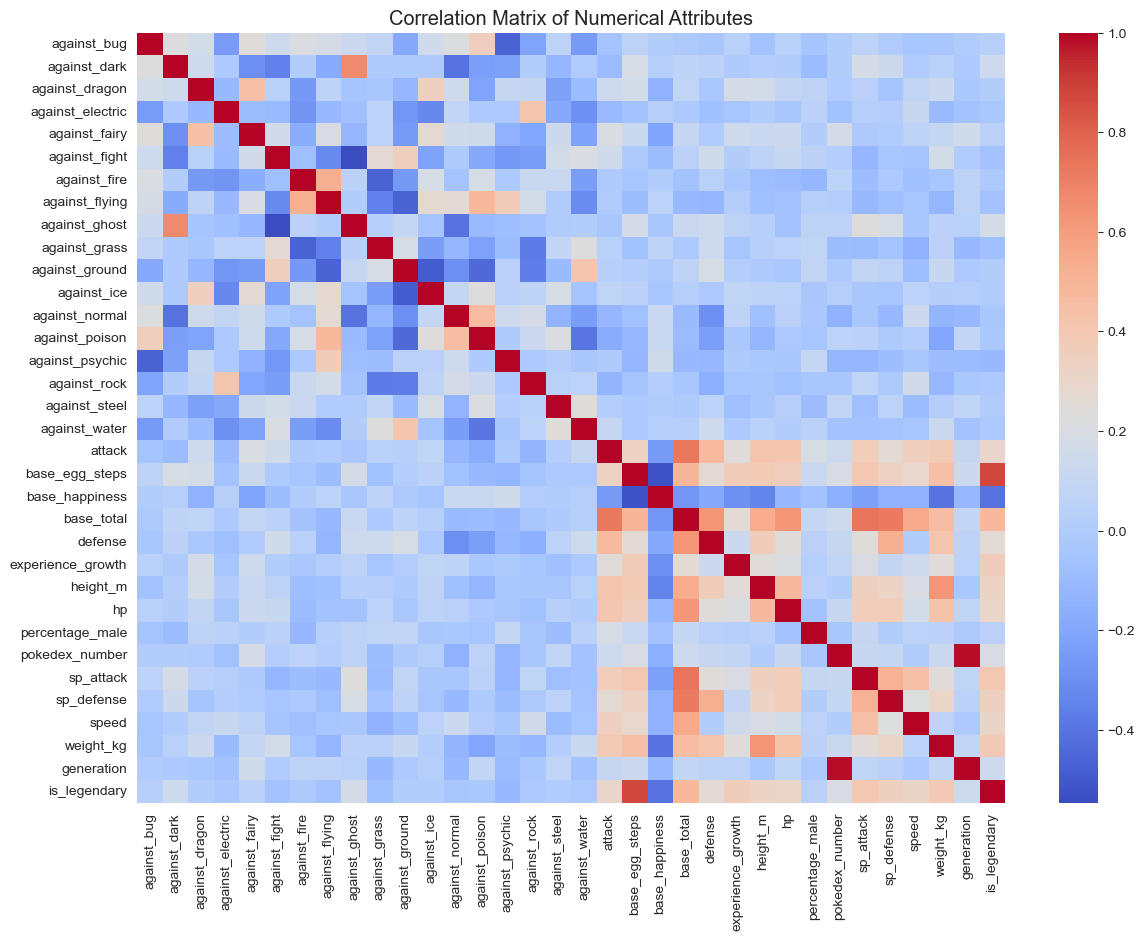

In [16]:

numeric = raw.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(14,10))
sns.heatmap(numeric.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix of Numerical Attributes")
plt.show()


***Most Correlated Variables:***
The strongest correlations appear between base_total and the individual combat stats such as attack, sp_attack, defense, sp_defense, hp, and speed, which is expected because base_total is built from them. Additionally, is_legendary is mainly correlated with base_total, attack, sp_attack, and speed, meaning that Pokémon with higher offensive and overall statistics are much more likely to be legendary.

***Least Correlated Variables:***
Very weak correlations are observed between is_legendary and type effectiveness variables (against_fire, against_water, against_grass, etc.), as well as with percentage_male and pokedex_number. This indicates that legendary status is not related to Pokémon type weaknesses or Pokédex order, but is primarily determined by core numerical combat attributes.

## Legendary vs Non-Legendary Comparison

C:\Users\khady\AppData\Local\Temp\ipykernel_12660\941436068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="is_legendary", data=raw, palette="Set2")


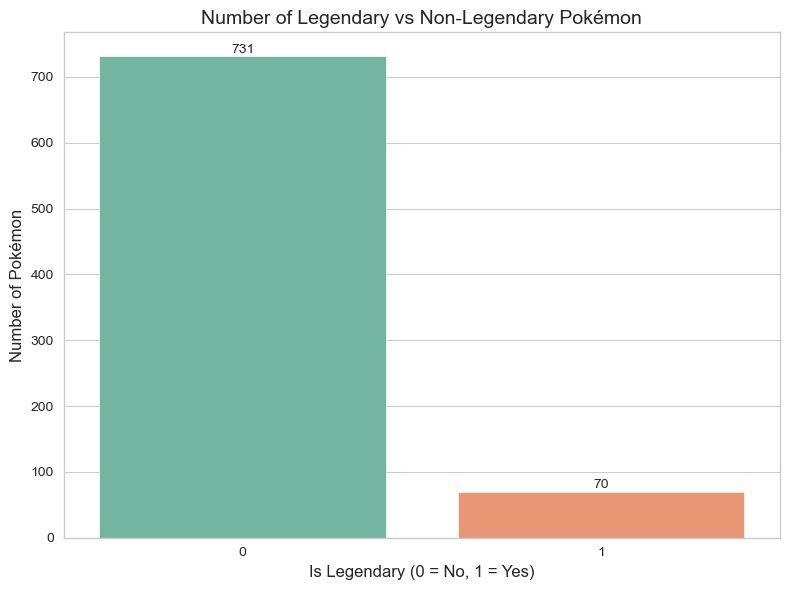

In [17]:
plt.figure(figsize=(8,6))

sns.countplot(x="is_legendary", data=raw, palette="Set2")

plt.title("Number of Legendary vs Non-Legendary Pokémon", fontsize=14)
plt.xlabel("Is Legendary (0 = No, 1 = Yes)")
plt.ylabel("Number of Pokémon")

# Add value labels on top of bars
counts = raw["is_legendary"].value_counts()
for i, v in enumerate(counts.sort_index()):
    plt.text(i, v + 5, str(v), ha='center')

plt.tight_layout()
plt.show()


This chart highlights the strong class imbalance in the dataset: far more non-legendary than legendary Pokémon. This has direct implications for the project workflow:

- **Data Preparation:** stratified train/test split is required to ensure legendary Pokémon are represented in both sets  
- **Feature Engineering:** emphasis must be placed on the most informative numerical features to improve class discrimination  
- **Modeling:** accuracy alone is not reliable; F1-score and AUC are prioritized, and techniques such as class weighting are necessary to handle imbalance


# DATA PREPARATION 
The data preparation stage was implemented through the script **data_preparation.py**. In this step, the raw dataset produced during data collection was processed and cleaned to make it suitable for modeling.

As a result, the dataset was transformed into a clean and structured version ***"cleaned.csv"*** containing only reliable features, which was then saved and used as input for the feature engineering stage.


In [18]:

cleaned = pd.read_csv("../data/cleaned.csv")
cleaned.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


## FEATURE ENGINEERING STAGE 
The feature engineering stage was carried out using the script **feature_engineering.py**.  
In this step, the goal was to transform the prepared dataset into a fully numerical format suitable for machine learning models. ***"engineered.csv"***

In this project:

- No dummy encoding was required, because all categorical text variables (such as abilities or names) had already been removed in the data preparation stage.  
- No logarithmic transformations were applied, since the numerical variables did not show extreme skewness and tree-based models like Random Forest do not require normalization.  
- The main focus was on selecting the most relevant numerical features and ensuring data consistency.


In [19]:

engineered = pd.read_csv("../data/engineered.csv")
engineered.head()

,hp,attack,defense,sp_attack,sp_defense,speed,base_total,height_m,weight_kg,generation,...,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,is_legendary
0,-0.902083,-0.897909,-0.780773,-0.195025,-0.211687,-0.738486,-0.926533,-0.431180,-0.496352,-1.394551,...,-0.994440,-0.132731,1.077461,0.424847,0.044909,2.009996,-0.359276,0.033097,-0.921115,0
1,-0.337312,-0.493413,-0.325488,0.268888,0.325465,-0.219268,-0.196233,-0.149853,-0.439893,-1.394551,...,-0.994440,-0.132731,1.077461,0.424847,0.044909,2.009996,-0.359276,0.033097,-0.921115,0
2,0.415717,0.688960,1.625735,1.567846,1.757871,0.473022,1.650503,0.787901,0.365344,-1.394551,...,-0.994440,-0.132731,1.077461,0.424847,0.044909,2.009996,-0.359276,0.033097,-0.921115,0
3,-1.127992,-0.804564,-0.975896,-0.349663,-0.748839,-0.046196,-1.002081,-0.524955,-0.481543,-1.394551,...,-0.677344,1.221628,-0.963642,0.424847,0.044909,-0.010722,1.076036,-0.967295,1.553384,0
4,-0.412614,-0.431183,-0.488090,0.268888,-0.211687,0.473022,-0.196233,-0.056078,-0.384359,-1.394551,...,-0.677344,1.221628,-0.963642,0.424847,0.044909,-0.010722,1.076036,-0.967295,1.553384,0


In [ ]:
pd.DataFrame({
    "Model Features": engineered.drop("is_legendary", axis=1).columns
})

,Model Features
0,hp
1,attack
2,defense
3,sp_attack
4,sp_defense
5,speed
6,base_total
7,height_m
8,weight_kg
9,generation


# Modeling Stage

The modeling stage was implemented through the script **modeling.py**.  
In this step, the final engineered dataset was used to train and evaluate machine learning models in a structured and reproducible way.

The main actions performed were:

- Loading the engineered dataset  
- Splitting the data into training and test sets using stratification  
- Training two models: Logistic Regression and Random Forest  
- Evaluating the models using appropriate metrics for imbalanced data  
- Comparing results based on F1-score and AUC  

This stage produced the final predictive models and allowed the selection of the best-performing one for the project.


### Hyperparameter Tuning with GridSearch

In the modeling stage, hyperparameter optimization was performed using **GridSearchCV** to improve model performance and ensure a fair comparison between algorithms.

For each model, the following hyperparameters were explored:

**Logistic Regression**
- Regularization strength (C)
- Class weighting to handle imbalance
- Solver and maximum iterations

**Random Forest**
- Number of trees (n_estimators)
- Maximum depth of the trees (max_depth)
- Minimum samples required to split a node (min_samples_split)
- Class weighting

After GridSearch optimization, the best configurations were automatically selected and used to train the final models.

This approach ensures that the modeling process is systematic, reproducible, and not based on arbitrary parameter choices.


In [21]:
import pandas as pd

results = {
    "Model": ["Logistic Regression", "Random Forest"],
    "F1 Score": [0.6111, 0.72],
    "ROC-AUC": [0.9504, 0.9888],
    "PR-AUC": [0.6955, 0.8905],
    "Balanced Accuracy": [0.8554, 0.8146],
    "Precision (Legendary)": [0.50, 0.82],
    "Recall (Legendary)": [0.79, 0.64]
}

df_results = pd.DataFrame(results)

df_results


,Model,F1 Score,ROC-AUC,PR-AUC,Balanced Accuracy,Precision (Legendary),Recall (Legendary)
0,Logistic Regression,0.6111,0.9504,0.6955,0.8554,0.50,0.79
1,Random Forest,0.7200,0.9888,0.8905,0.8146,0.82,0.64


## Selecting the Best Model

In [ ]:
best_model_row = df_results.loc[df_results["F1 Score"].idxmax()]

print("===== BEST MODEL SELECTION =====")
print(best_model_row)

===== BEST MODEL SELECTION =====
Model                    Random Forest
F1 Score                          0.72
ROC-AUC                         0.9888
PR-AUC                          0.8905
Balanced Accuracy               0.8146
Precision (Legendary)             0.82
Recall (Legendary)                0.64
Name: 1, dtype: object


### Final Model Decision

**Random Forest**

This model achieved the highest F1-score while also delivering strong performance in terms of ROC-AUC and PR-AUC.  
It offers the best trade-off between correctly identifying legendary Pokémon and minimizing false positives, making it the most appropriate choice for the objectives of this project.


# MLflow